## Observations and Insights 

Observations:

1. Younger mice have larger tumor volumes than the older ones.
2. The Capomulin drug regimen had the most amount of timepoints.
3. Based on the data, there is infact a correlation between mouse weight and average tumor volume.

In [2]:
# Dependencies and Setup



import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_complete = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
mouse_metadata_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [3]:
# Checking the number of mice.
mice_count = mouse_metadata_complete["Mouse ID"].unique()
mice_count
print(f'The number of mice is: ', len(mice_count))


The number of mice is:  249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
double_mice = mouse_metadata_complete[mouse_metadata_complete.duplicated()]
double_mice
# https://www.statology.org/pandas-find-duplicates/





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = mouse_metadata_complete.loc[mouse_metadata_complete["Mouse ID"] != "g989"]
clean_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_mouse["Mouse ID"].unique()
clean_mice_count
print(f'The number of mice is: ', len(clean_mice_count))


The number of mice is:  248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor = clean_mouse["Tumor Volume (mm3)"]
tumor_mean = tumor.mean()
tumor_mean = [tumor_mean]

tumor_median = tumor.median()
tumor_median = [tumor_median]

tumor_variance = tumor.var()
tumor_variance = [tumor_variance]

tumor_std_deviation = tumor.std()
tumor_std_deviation = [tumor_std_deviation]

tumor_sem = tumor.sem()
tumor_sem = [tumor_sem]

summary_stat = pd.DataFrame({"Mean": tumor_mean,
                            "Median": tumor_median,
                            "Variance": tumor_variance,
                            "Standard Deviation": tumor_std_deviation,
                            "SEM": tumor_sem,
                            })
print(summary_stat)


        Mean     Median   Variance  Standard Deviation       SEM
0  50.435293  48.933454  79.462907            8.914197  0.205591


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stat.aggregate(["sum"])


,Mean,Median,Variance,Standard Deviation,SEM
sum,50.435293,48.933454,79.462907,8.914197,0.205591


## Bar and Pie Charts

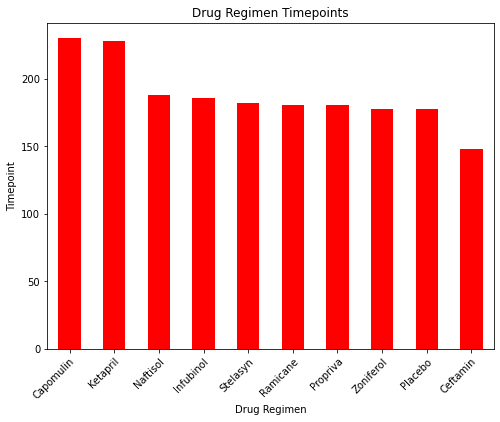

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


drug_data = clean_mouse["Drug Regimen"].value_counts()
drug_data
figure1 = drug_data.plot(kind = "bar", facecolor="red", figsize=(8,6),
                            title = "Drug Regimen Timepoints",
                            xlabel="Drug Regimen",
                            ylabel="Timepoint")
xticklabels = mouse_metadata_complete["Drug Regimen"].unique()
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.show()



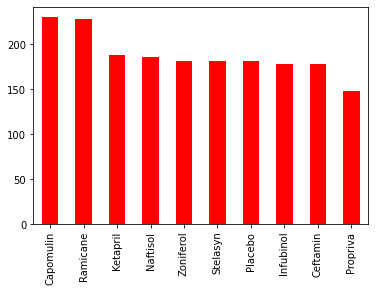

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drugs = clean_mouse['Drug Regimen'].value_counts()
drugs.plot(kind = "bar", color="red")


plt.show()




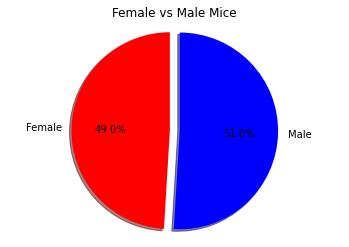

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = ["Female", "Male"]
gender_count = clean_mouse["Sex"].value_counts()
gender_count
# used the output to get the counts of the genders
sizes = [922, 958]
colors = ["Red", "Blue"]
explode = (0.1, 0,)

plt.title("Female vs Male Mice")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()






<AxesSubplot:title={'center':'Female vs Male Mice'}, ylabel='Sex'>

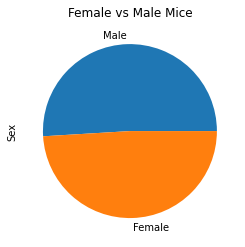

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_chart = clean_mouse['Sex'].value_counts()
pie_chart.plot(kind="pie", title="Female vs Male Mice")


## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoints = clean_mouse.groupby('Mouse ID')["Timepoint"].max()
# last_timepoints.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

last_timepoint_merged = pd.merge(last_timepoints, clean_mouse, how="left", on=["Mouse ID", "Timepoint"])
last_timepoint_merged.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_vols=last_timepoints['Tumor Volume (mm3)']
quartiles = tumor_vols.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")
# Locate the rows which contain mice on each drug and get the tumor volumes
for x in treatments_list:
    
    
# add subset 
    
    
# Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    

The lower quartile of Tumor Volume is: 46.8854749175
The upper quartile of Tumor Volume is: 65.05362410500001
The interquartile range of Tumor Volume is: 18.168149187500013
The the median of Tumor Volume is: 55.793278175 


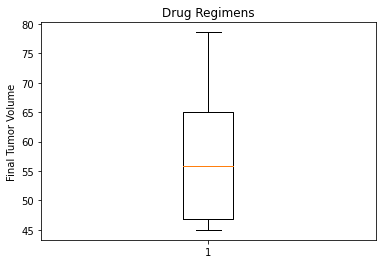

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimens')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(tumor_vols)
plt.show()


## Line and Scatter Plots

InvalidIndexError: (slice(None, None, None), None)

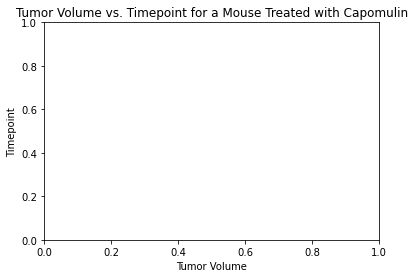

In [31]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = clean_mouse.loc[clean_mouse["Drug Regimen"] == 'Capomulin']

plt.title("Tumor Volume vs. Timepoint for a Mouse Treated with Capomulin")
plt.xlabel("Tumor Volume")
plt.ylabel("Timepoint")

plt.plot(capomulin, capomulin["Timepoint"], marker="o", color="red", linewidth=1)
plt.show()



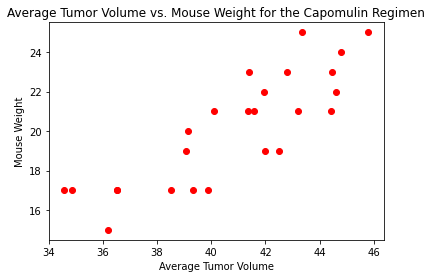

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin = clean_mouse.loc[clean_mouse["Drug Regimen"] == 'Capomulin']

group_capomulin = capomulin.groupby(["Mouse ID"]).mean()

# group_capomulin.head()

plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Mouse Weight")

plt.scatter(group_capomulin["Tumor Volume (mm3)"], group_capomulin["Weight (g)"], marker="o", color="red")
plt.show()

## Correlation and Regression

In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cor_weight = capomulin.iloc[:,4]
cor_tumor = capomulin.iloc[:,6]
correlation = st.pearsonr(cor_weight,cor_tumor)

print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")




The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.53


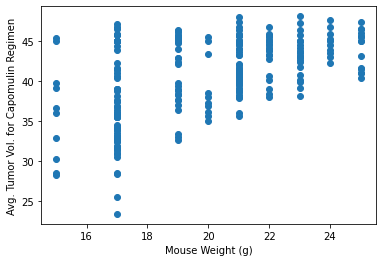

In [43]:
# linear regression model

plt.scatter(cor_weight,cor_tumor)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg. Tumor Vol. for Capomulin Regimen")
plt.show()